## Import all modules

In [2]:
import yaml
import json
import sqlite3
from datetime import datetime
import pandas as pd
import sklearn
from json_flatten import flatten
from sklearn import tree
import numpy as np
from sklearn.cluster import KMeans


## Retrieve all bots from SQL database

In [4]:
conn = sqlite3.connect('goodbot_table.db')
cur = conn.cursor()

cur.execute("SELECT * FROM user_info WHERE bot_rating > 3.5")

#Check how many users in total
#cur.execute("SELECT * FROM user_info WHERE bot_rating IS NOT NULL")

user_info_all_result = cur.fetchall()
user_info_column_names = [description[0] for description in cur.description]
user_info_bot_dataframe = pd.DataFrame(user_info_all_result, \
                                   columns=user_info_column_names)
print(f"No of user info stored: {len(user_info_all_result)}\n")

conn.close()

No of user info stored: 101



## Load JSON attributes for goodbot into a dataframe

In [7]:
f = open('./GoodBot_parameters/Bot_001_019.json')


arr = json.load(f)

flattened_arr = []

for elem in arr['result']:
    flattened_arr.append(flatten(elem))
    
df = pd.DataFrame(flattened_arr)

print(df)

f.close()

   user.screen_name          user.id_str user.lang categories.astroturf$float  \
0      TnNguynNgc12  1406983013095776259        vi                       0.14   
1   PienaNashetania           4586856613        in                       0.01   
2          inthreek           1516297345        en                       0.02   
3       ocaesar0310           2515694738        ja                       0.04   
4       a_kitsumaru           2158721414        ja                        NaN   
5   cephalopodluke2   983177740965773312        en                       0.71   
6   ErzaOfFairyTail            838182517        en                       0.22   
7   Farozipauundana  1308026872630976512        en                       0.06   
8          himeka_s           1065120397        ja                        NaN   
9        Long123475  1154918356320788481        vi                       0.01   
10   xPirateCoveFox           3243767972        en                       0.05   
11      fabricsarts  1187889

## Setup Classifier

number of estimated clusters : 3


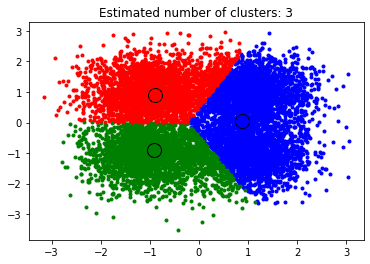

In [15]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
